ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **03Dec2018**

# 15. Multiple Reactions at Equilibrium
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{x}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\gradx}{\nabla\!_{\xvec}}
  \newcommand{\Kcal}{\mathcal{K}}
  \newcommand{\epsvec}{\boldsymbol{\varepsilon}}
$

---
## Table of Contents
* [Introduction](#intro)
* [Algorithm](#algo)
---

## Introduction<a id="intro"></a>
Newton's method for computing roots of multiple non-linear equations, $\Kcal\bigl(\xvec(\widehat{\epsvec})\bigr)=0$, is described [here](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmWlQK3zr2xDu2YWkfFCoZYB2dunRc4yHyxu4X5d-owMnA?e=jF7cfF).


## Algorithm<a id="algo"></a>

Given $\Kcal\bigl(\xvec(\widehat{\epsvec})\bigr)$, find the root

\begin{equation*}
\Kcal\bigl(\xvec(\widehat{\epsvec})\bigr) = 0 ,
\end{equation*}

using an iterative method based on the initial guess $\widehat{\epsvec}_0$.


In [5]:
'''Import the ammonia reaction mechanism'''

try:    
    from chen_3170.toolkit import reaction_mechanism
    # read species, reaction and build the stoichiometric matrix
    (species, reactions, keq_cte, stoic_mtrx) = reaction_mechanism('data/ammonia-rxn.txt')
    
except ModuleNotFoundError:
    assert False, 'You need to provide your own reaction_mechanis function here. Bailing out.'



species= ['NO2', 'H2O', 'O2', 'NH3', 'N2', 'NO']

r0 :  4 NH3+5 O2<=>4 NO+6 H2O
r1 :  4 NH3+3 O2<=>2 N2+6 H2O
r2 :  4 NH3+6 NO<=>5 N2+6 H2O
r3 :  2 NO+1 O2<=>2 NO2
r4 :  2 NO<=>1 N2+1 O2
r5 :  1 N2+2 O2<=>2 NO2
r6 :  4 NH3+4 NO+1 O2<=>4 N2+6 H2O
n_reactions = 7

K_x eq =  [250.0, 180.0, 109.9692, 100.0, 0.8485281, 117.8511, 129.6]

matrix shape = (7, 6)


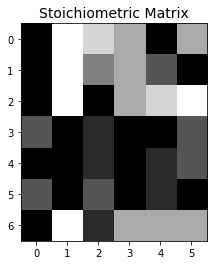


stoic_mtrx=
 [[ 0.  6. -5. -4.  0.  4.]
 [ 0.  6. -3. -4.  2.  0.]
 [ 0.  6.  0. -4.  5. -6.]
 [ 2.  0. -1.  0.  0. -2.]
 [ 0.  0.  1.  0.  1. -2.]
 [ 2.  0. -2.  0. -1.  0.]
 [ 0.  6. -1. -4.  4. -4.]]


In [10]:
'''Sanity check on the data'''

print('species=',species)
from chen_3170.help import print_reactions
print('')
print_reactions(reactions) 
print('')
print('K_x eq = ',keq_cte)
print('')
from chen_3170.help import plot_matrix
plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')
print('')
import numpy as np
np.set_printoptions(precision=3,threshold=100,edgeitems=5)
print('stoic_mtrx=\n',stoic_mtrx)